# Date Fruit

## Business Analysis

- **AREA:** La superficie de la date, peut-être en unités spécifiques de mesure (par exemple, millimètres carrés).

- **PERIMETER:** Le périmètre de la date, c'est-à-dire la longueur du contour externe de la date.

- **MAJOR_AXIS:** L'axe majeur d'une ellipse ajustée à la date. Il s'agit généralement de la plus grande longueur de la date.

- **MINOR_AXIS:** L'axe mineur d'une ellipse ajustée à la date. Il s'agit généralement de la plus petite longueur de la date.

- **ECCENTRICITY:** Mesure de l'aplatissement de la date, calculée comme la racine carrée de 1 - (axe mineur/axe majeur)^2.

- **EQDIASQ:** La valeur de l'équivalent diamètre carré, qui représente le diamètre d'un cercle ayant la même aire que la date.

- **SOLIDITY:** Le rapport entre la superficie de la date et la superficie du plus petit rectangle englobant la date.

- **CONVEX_AREA:** L'aire de la forme convexe de la date, c'est-à-dire la zone englobée par le contour extérieur le plus étendu de la date.

- **EXTENT:** Mesure de la compacité de la date, calculée comme l'aire de la date divisée par l'aire du rectangle englobant la date.

- **ASPECT_RATIO:** Le rapport entre l'axe majeur et l'axe mineur de la date, souvent utilisé pour décrire la forme de la date.

- **ROUNDNESS:** Une mesure de la circularité de la date, généralement calculée en fonction de la compacité ou de la convexité de la forme.

- **COMPACTNESS:** Une mesure de la compacité de la date, souvent basée sur le ratio entre l'aire de la date et son périmètre.

- **SHAPEFACTOR_1 à SHAPEFACTOR_4:** Des facteurs de forme supplémentaires ou des mesures géométriques spécifiques utilisés pour caractériser la forme de la date.

- **MeanRR, MeanRG, MeanRB, StdDevRR, StdDevRG, StdDevRB, SkewRR, SkewRG, SkewRB, KurtosisRR, KurtosisRG, KurtosisRB, EntropyRR, EntropyRG, EntropyRB, ALLdaub4RR, ALLdaub4RG, ALLdaub4RB:** Ces variables semblent être des statistiques des canaux de couleur ou des caractéristiques basées sur la distribution des valeurs de couleur (probablement pour les canaux Rouge, Vert et Bleu).

- **Class:** Une variable catégorielle qui peut indiquer la classe, le type ou une étiquette associée à chaque date. Par exemple, cela pourrait représenter différentes catégories de dates en fonction de certaines caractéristiques.

- target variable : class

## Loading Data

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [31]:
df = pd.read_excel('Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx')

In [32]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [33]:
df.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

## Understanding Data

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AREA,898.0,2.982952e+05,1.072452e+05,1.987000e+03,2.069480e+05,3.198330e+05,3.825730e+05,5.460630e+05
PERIMETER,898.0,2.057661e+03,4.100125e+02,9.118280e+02,1.726091e+03,2.196345e+03,2.389717e+03,2.811997e+03
MAJOR_AXIS,898.0,7.508120e+02,1.440593e+02,3.367227e+02,6.410686e+02,7.913634e+02,8.586338e+02,1.222723e+03
MINOR_AXIS,898.0,4.958728e+02,1.142689e+02,2.283200e+00,4.046844e+02,4.950548e+02,5.890317e+02,7.664536e+02
ECCENTRICITY,898.0,7.374678e-01,8.872739e-02,3.448000e-01,6.856250e-01,7.547000e-01,8.021500e-01,1.000000e+00
EQDIASQ,898.0,6.045779e+02,1.195939e+02,5.029840e+01,5.133171e+02,6.381409e+02,6.979305e+02,8.338279e+02
SOLIDITY,898.0,9.818403e-01,1.815742e-02,8.366000e-01,9.788250e-01,9.873000e-01,9.918000e-01,9.974000e-01
CONVEX_AREA,898.0,3.038456e+05,1.088157e+05,2.257000e+03,2.100228e+05,3.272070e+05,3.888040e+05,5.525980e+05
EXTENT,898.0,7.362671e-01,5.374518e-02,5.123000e-01,7.058750e-01,7.469500e-01,7.758500e-01,8.562000e-01
ASPECT_RATIO,898.0,2.131102e+00,1.782078e+01,1.065300e+00,1.373725e+00,1.524150e+00,1.674750e+00,5.355257e+02


- From this results , it appears that there is some variables which are not distributed


In [36]:
df.describe(include='object')

,Class
count,898
unique,7
top,DOKOL
freq,204


We can extract that the target variable has 7 unique values that must be  encoded

In [37]:
df.isnull().sum().sum()

0

In [38]:
df.duplicated().sum()

0

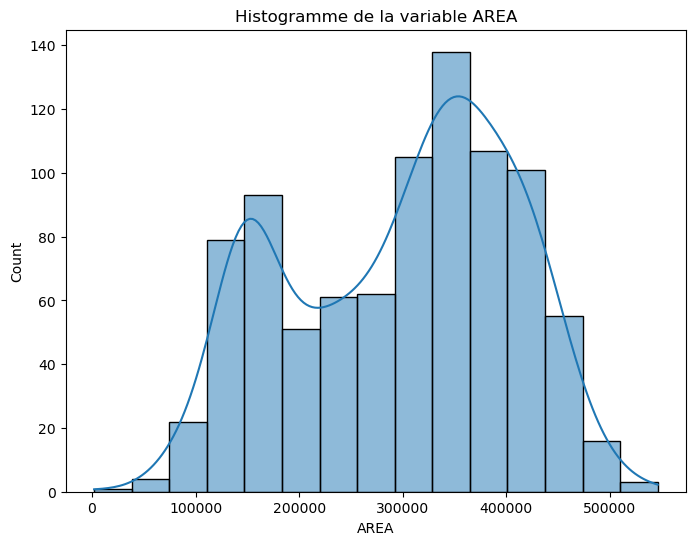

La variable AREA ne suit pas une loi normale (p-value=1.830063022683039e-44)


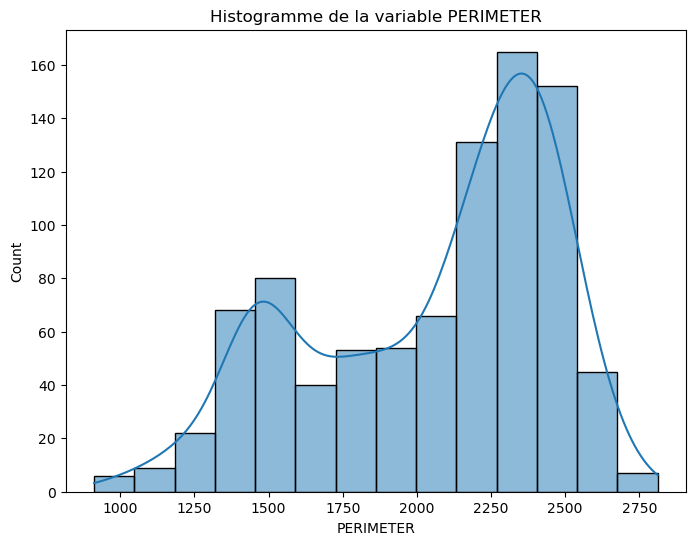

La variable PERIMETER ne suit pas une loi normale (p-value=3.116147967461825e-25)


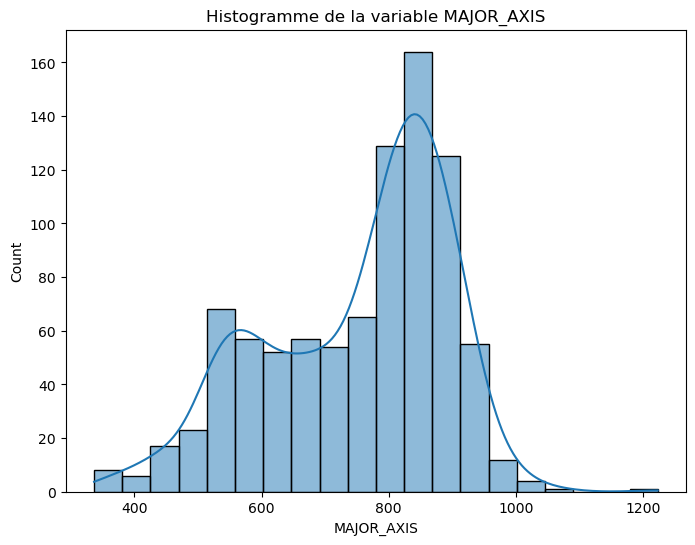

La variable MAJOR_AXIS ne suit pas une loi normale (p-value=5.174025105817626e-13)


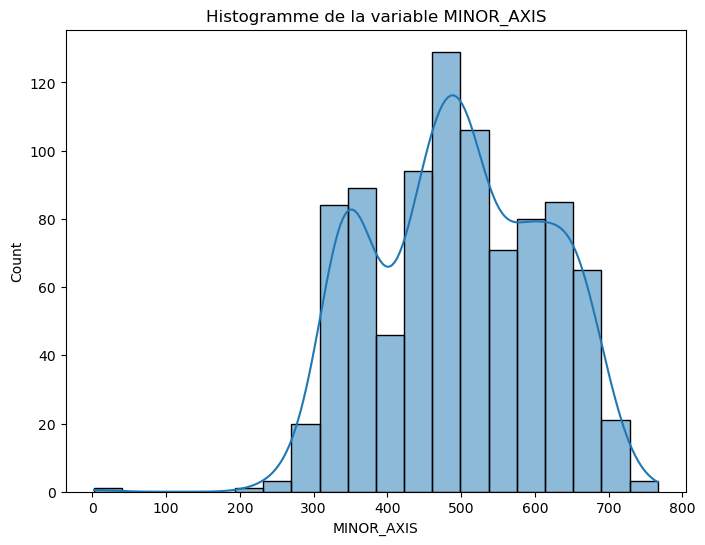

La variable MINOR_AXIS ne suit pas une loi normale (p-value=2.348445300164841e-08)


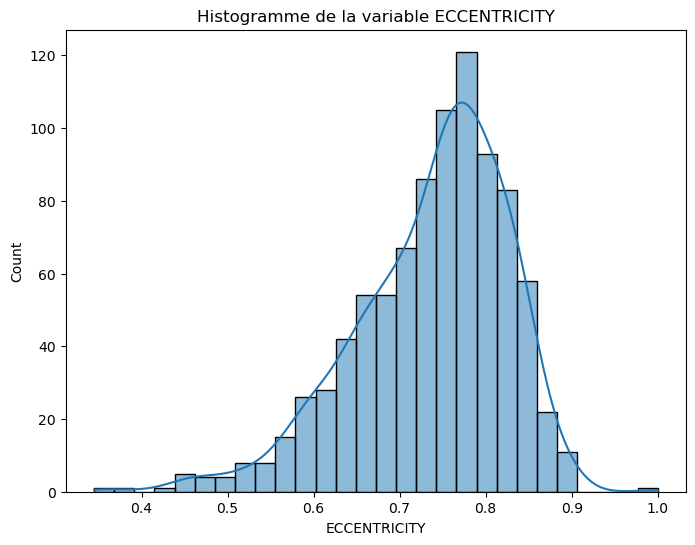

La variable ECCENTRICITY ne suit pas une loi normale (p-value=1.5729816471990885e-23)


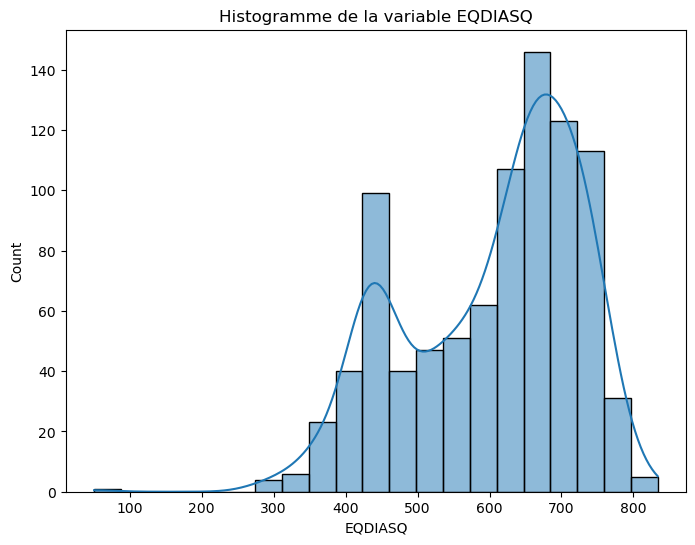

La variable EQDIASQ ne suit pas une loi normale (p-value=1.80964505019694e-13)


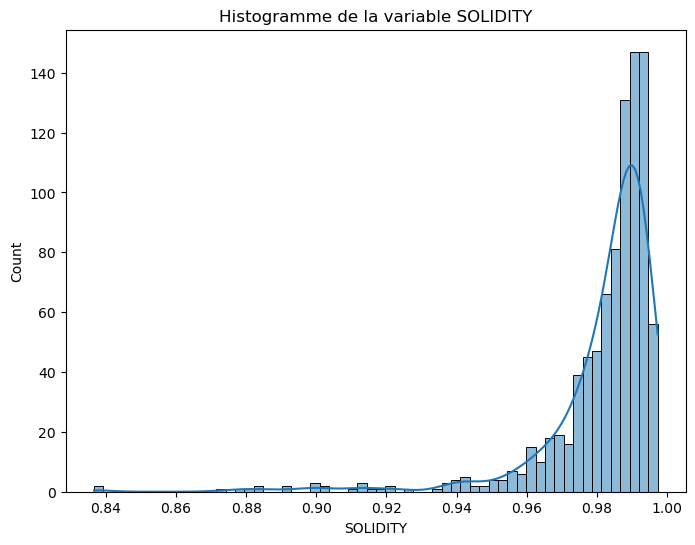

La variable SOLIDITY ne suit pas une loi normale (p-value=2.0806510632559383e-157)


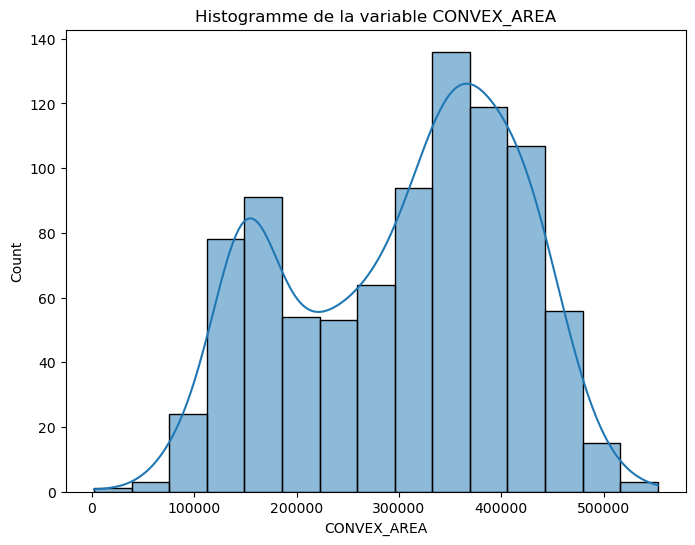

La variable CONVEX_AREA ne suit pas une loi normale (p-value=2.585665465127289e-47)


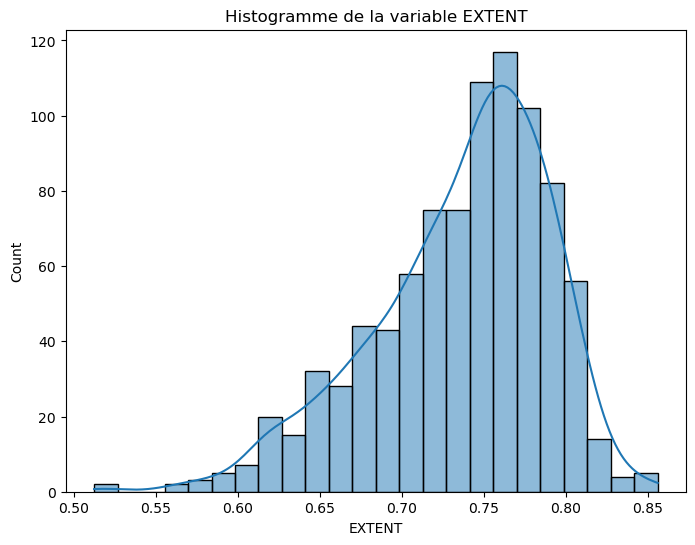

La variable EXTENT ne suit pas une loi normale (p-value=1.6620104903375983e-18)


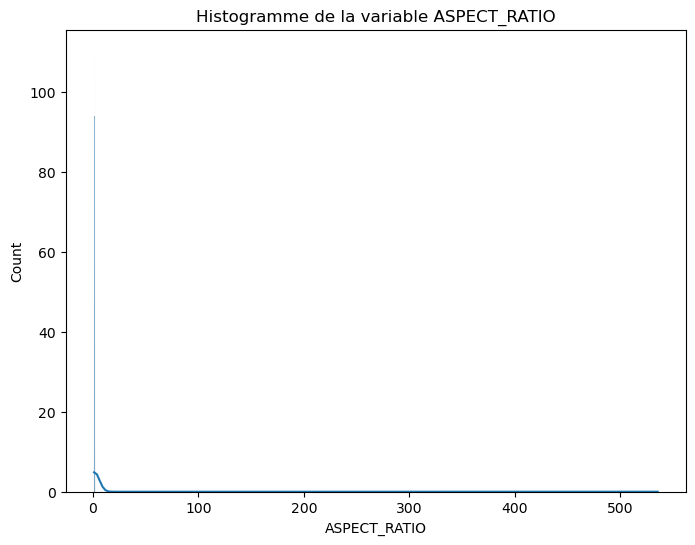

La variable ASPECT_RATIO ne suit pas une loi normale (p-value=0.0)


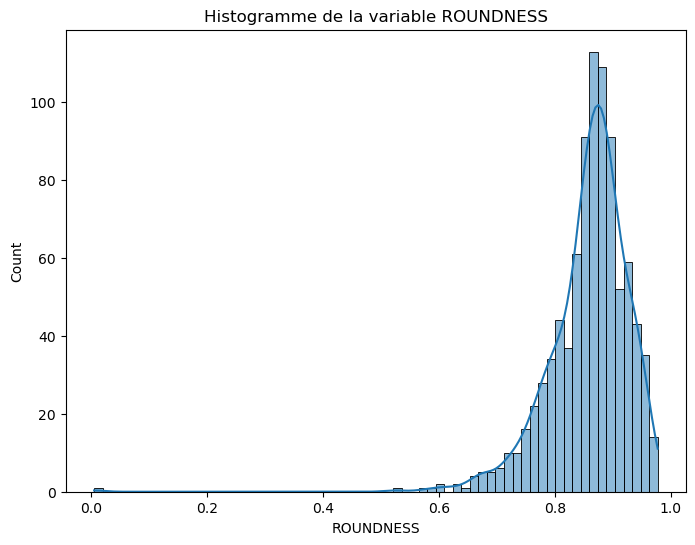

La variable ROUNDNESS ne suit pas une loi normale (p-value=1.79205974028062e-138)


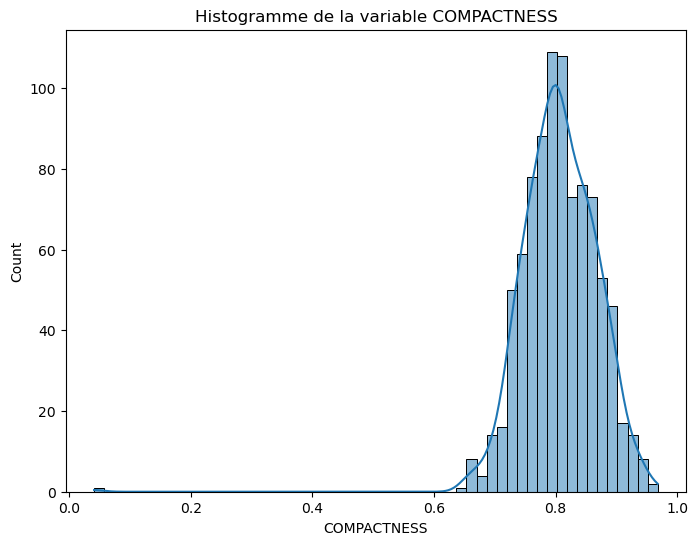

La variable COMPACTNESS ne suit pas une loi normale (p-value=1.8506910093924327e-116)


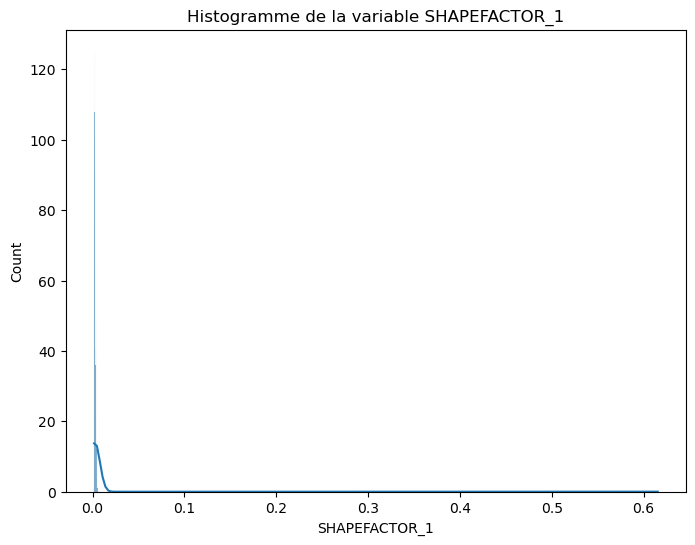

La variable SHAPEFACTOR_1 ne suit pas une loi normale (p-value=0.0)


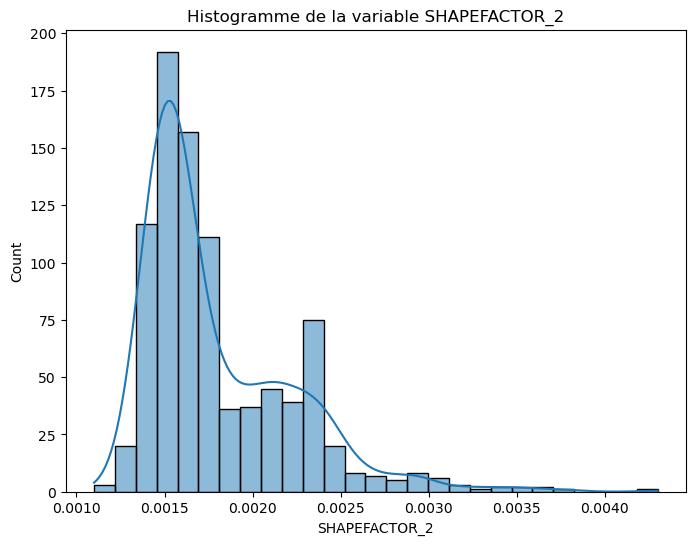

La variable SHAPEFACTOR_2 ne suit pas une loi normale (p-value=2.2472092133581244e-60)


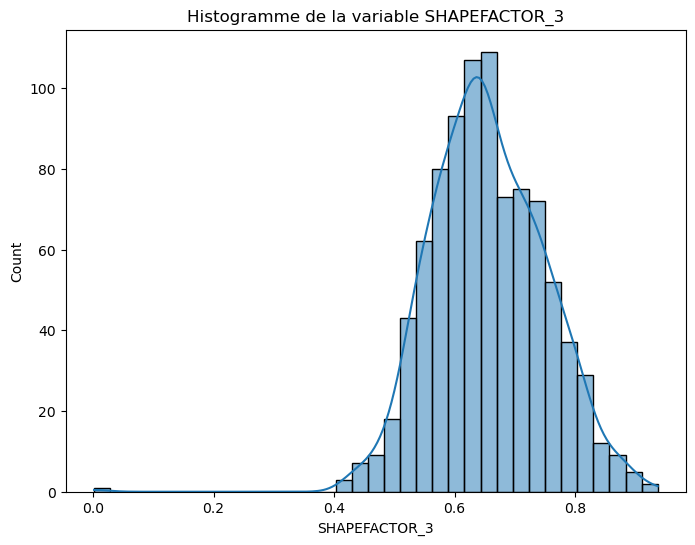

La variable SHAPEFACTOR_3 ne suit pas une loi normale (p-value=1.7598343500522852e-11)


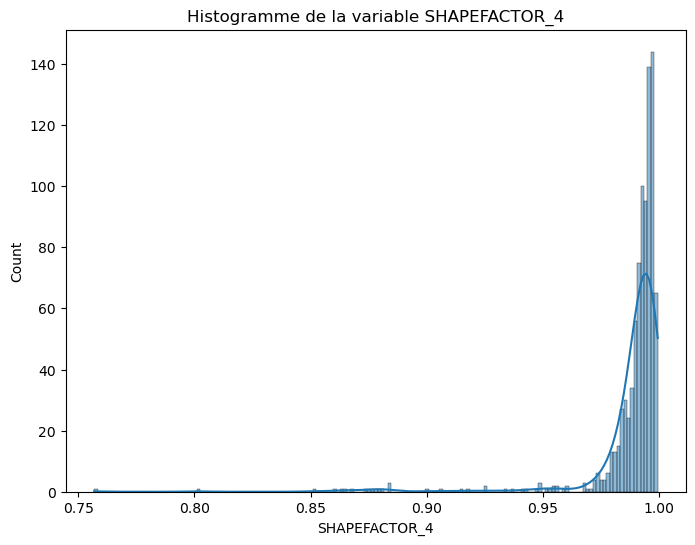

La variable SHAPEFACTOR_4 ne suit pas une loi normale (p-value=6.069050905587686e-225)


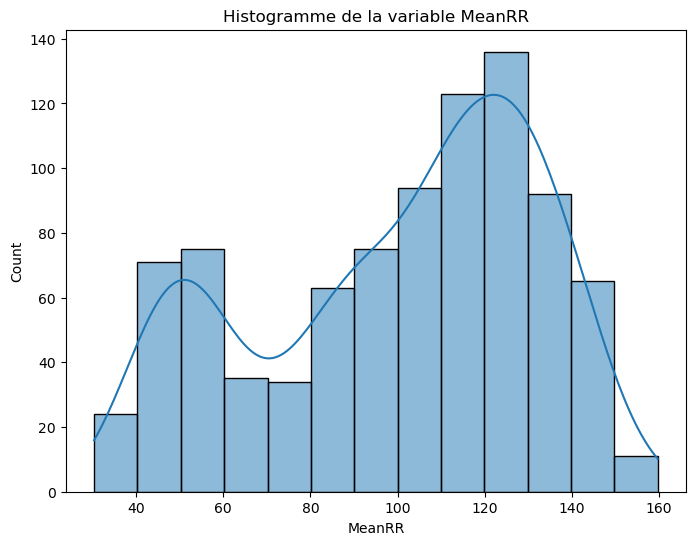

La variable MeanRR ne suit pas une loi normale (p-value=1.477698486138194e-39)


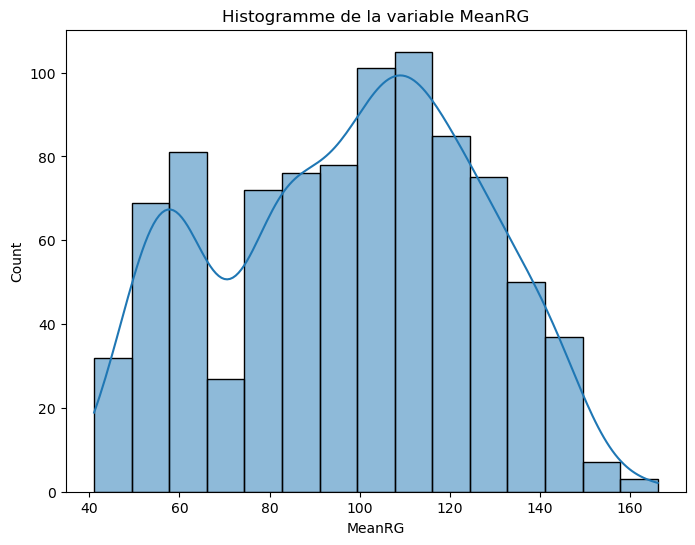

La variable MeanRG ne suit pas une loi normale (p-value=2.8199081659933995e-31)


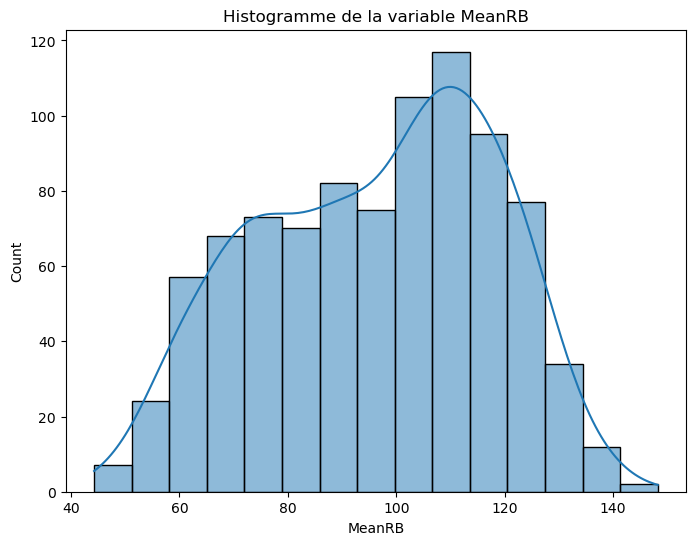

La variable MeanRB ne suit pas une loi normale (p-value=4.567877729342843e-28)


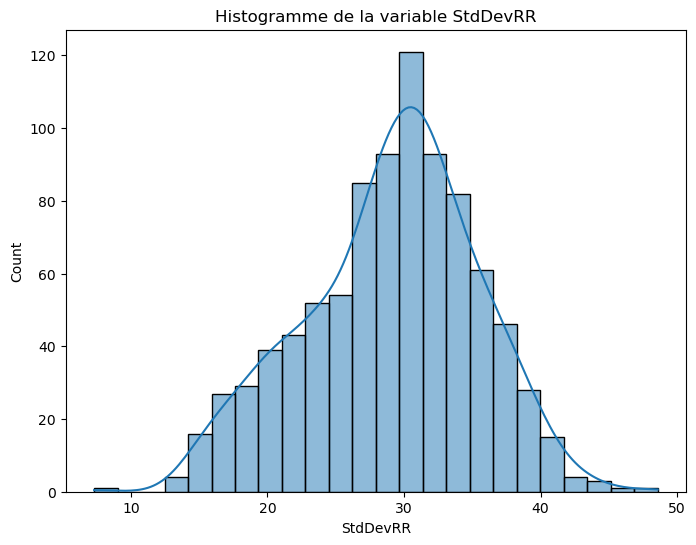

La variable StdDevRR ne suit pas une loi normale (p-value=0.001996519196672735)


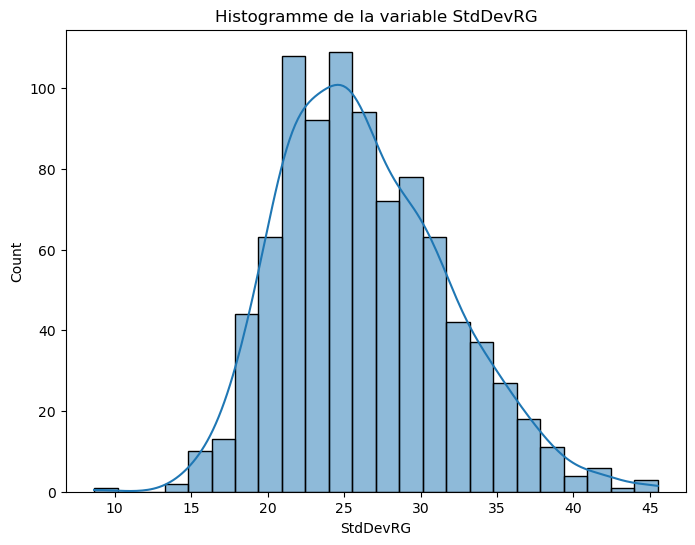

La variable StdDevRG ne suit pas une loi normale (p-value=8.725228917655939e-09)


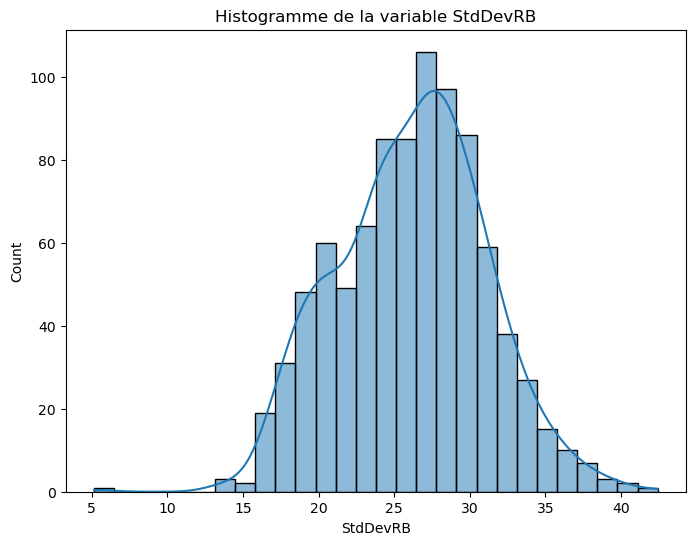

La variable StdDevRB suit une loi normale (p-value=0.9134891758319023)


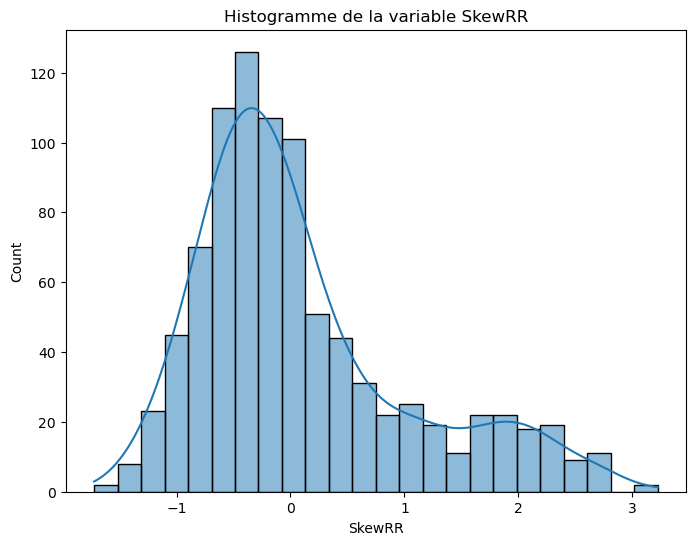

La variable SkewRR ne suit pas une loi normale (p-value=1.1673537728334292e-28)


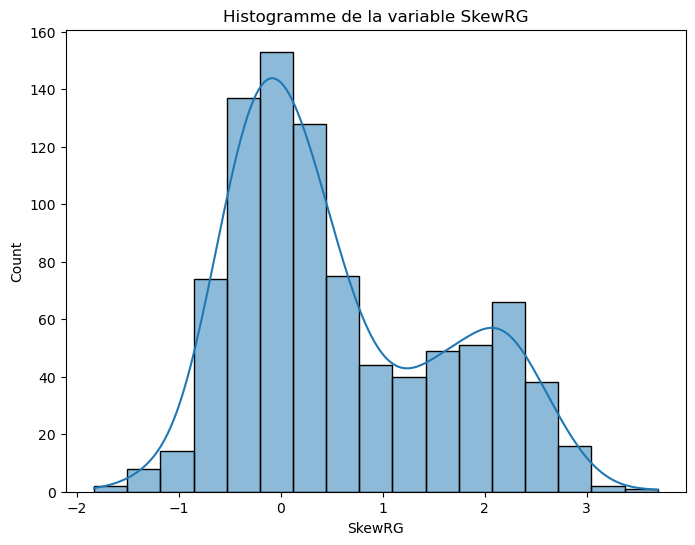

La variable SkewRG ne suit pas une loi normale (p-value=5.696790662930302e-20)


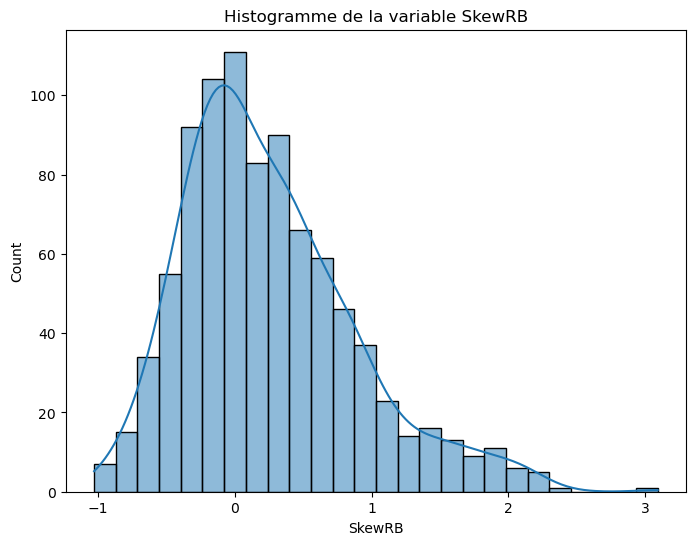

La variable SkewRB ne suit pas une loi normale (p-value=9.605228812305632e-24)


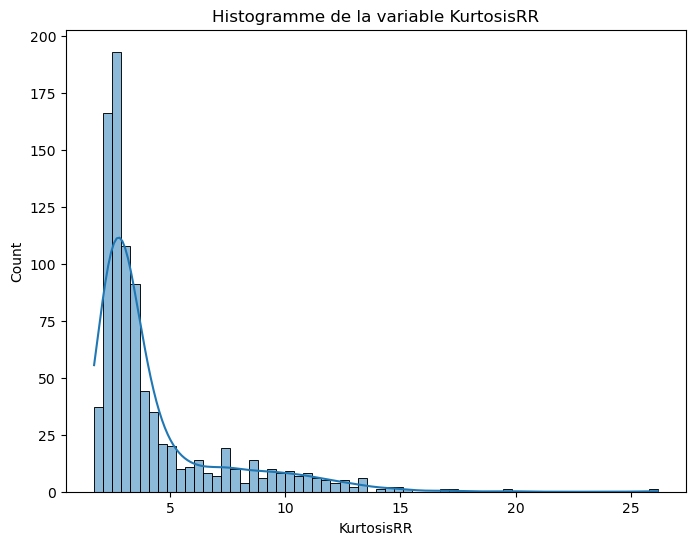

La variable KurtosisRR ne suit pas une loi normale (p-value=4.7582828792384015e-98)


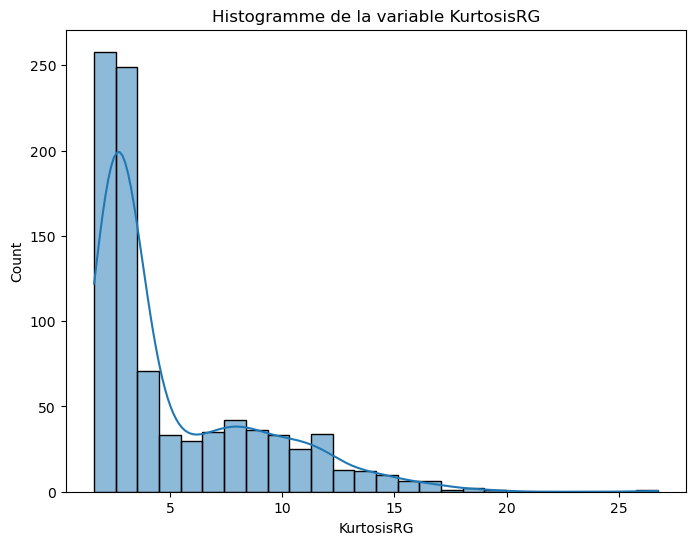

La variable KurtosisRG ne suit pas une loi normale (p-value=8.70464793877057e-51)


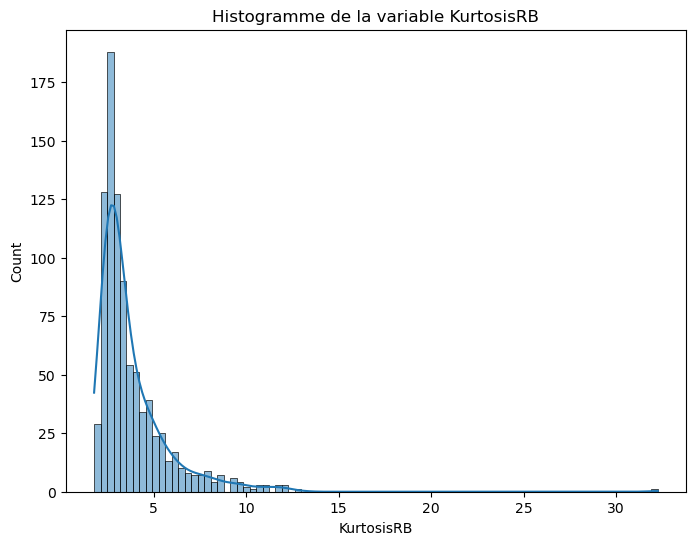

La variable KurtosisRB ne suit pas une loi normale (p-value=8.600238179272142e-196)


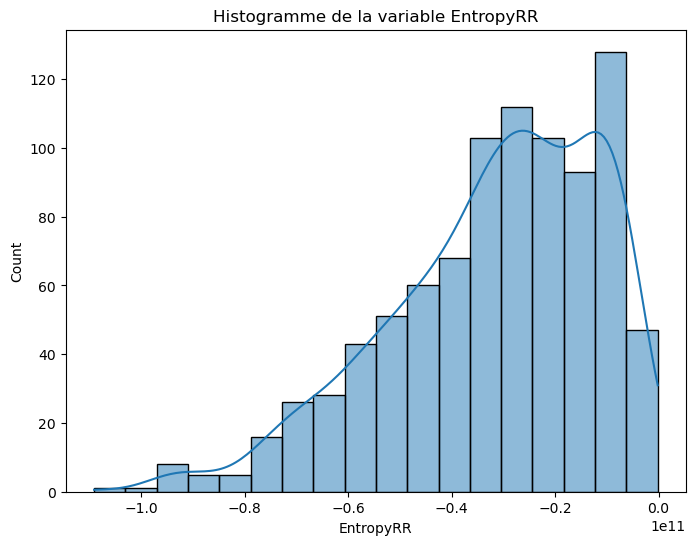

La variable EntropyRR ne suit pas une loi normale (p-value=1.6350759121718413e-17)


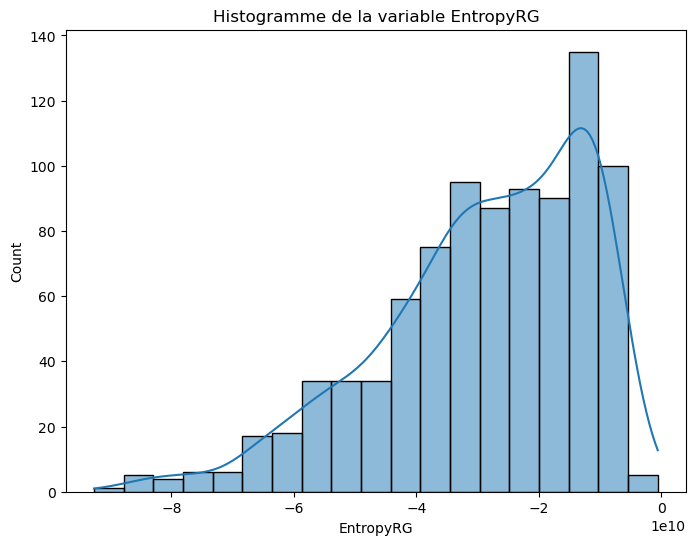

La variable EntropyRG ne suit pas une loi normale (p-value=5.611150128997169e-20)


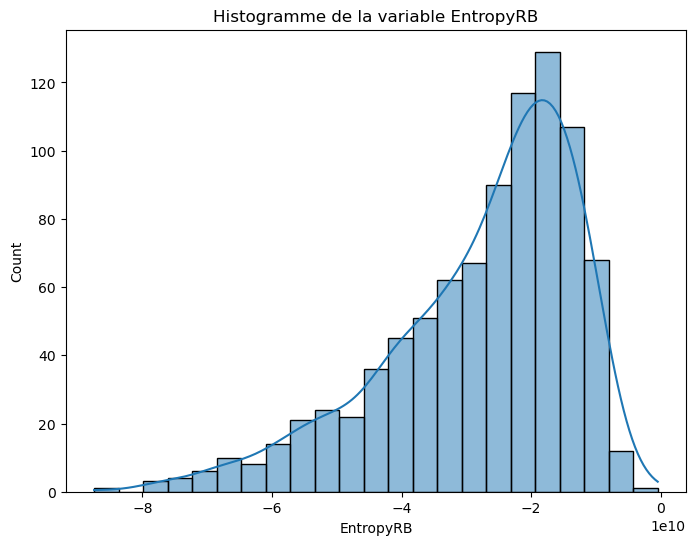

La variable EntropyRB ne suit pas une loi normale (p-value=4.110770092353551e-29)


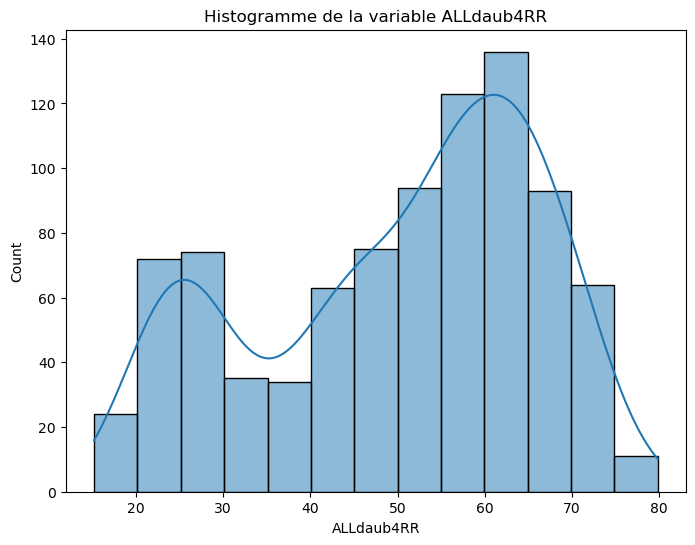

La variable ALLdaub4RR ne suit pas une loi normale (p-value=1.454374981928167e-39)


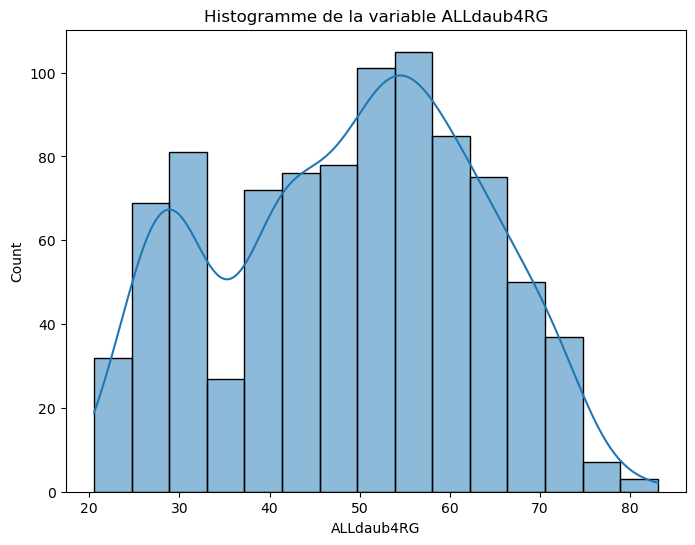

La variable ALLdaub4RG ne suit pas une loi normale (p-value=2.801525226081363e-31)


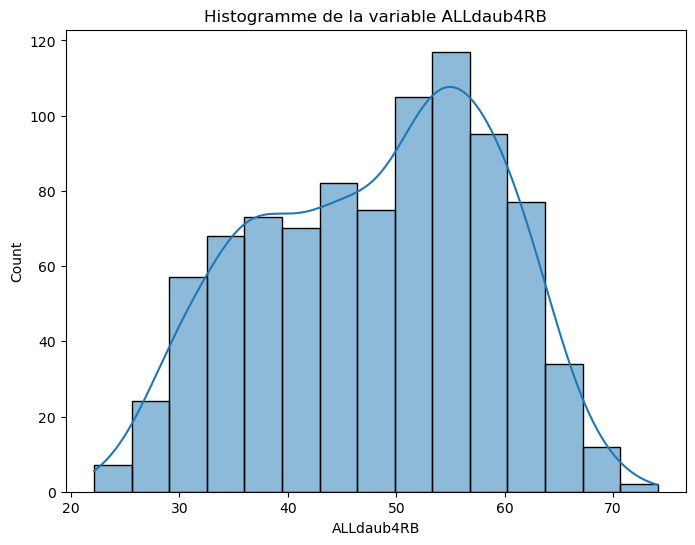

La variable ALLdaub4RB ne suit pas une loi normale (p-value=4.486840367247312e-28)


In [39]:

### Création d'un histogramme et d'un test de normalité pour chaque variable
for column in df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()

    statistic, p_value = stats.normaltest(df[column])
    if p_value < 0.05:
        print(f"La variable {column} ne suit pas une loi normale (p-value={p_value})")
    else:
        print(f"La variable {column} suit une loi normale (p-value={p_value})")

### Outeliers

In [41]:
columns_to_visualize = ['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB']

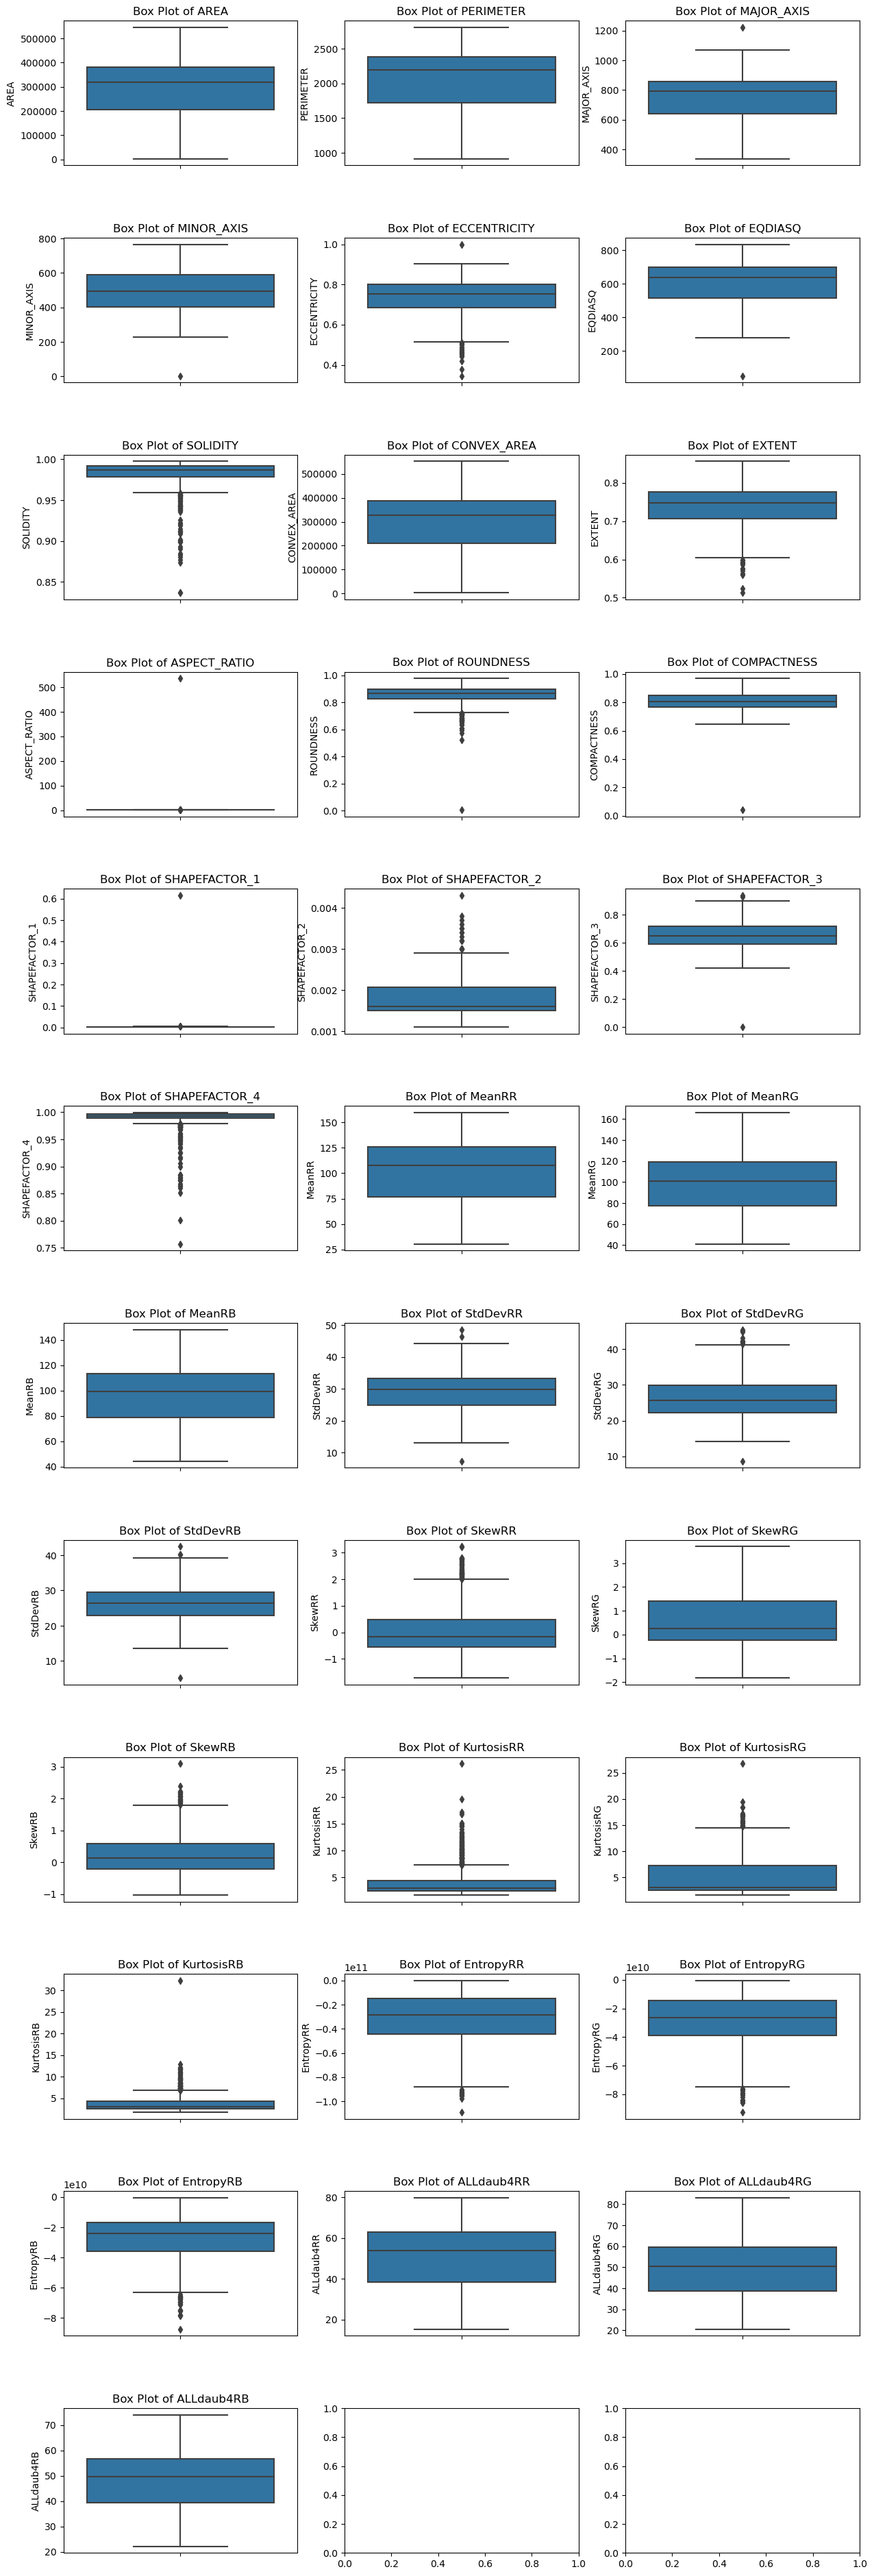

In [42]:
def boxplots(df,columns_to_visualize):
    
 # Number of columns to display per row in subplots
 columns_per_row = 3

 # Calculating the total number of lines needed
 total_rows = (len(columns_to_visualize) - 1) // columns_per_row + 1

 # Création des sous-plots
 fig, axes = plt.subplots(total_rows, columns_per_row, figsize=(15, 4 * total_rows))

 # Adjusting the spacing between sub-plots
 fig.subplots_adjust(hspace=0.5)  # Adjust the value as needed

 # Iteration on each column and creation of the box plot
 for i, column in enumerate(columns_to_visualize):
    row = i // columns_per_row
    col = i % columns_per_row
    
    sns.boxplot(y=df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {column}')

 # Display of subplots
 plt.show()
boxplots(df,columns_to_visualize)

In [44]:
count = df.Class.value_counts()

Text(0.5, 1.0, 'Class Distribution (Bar Chart)')

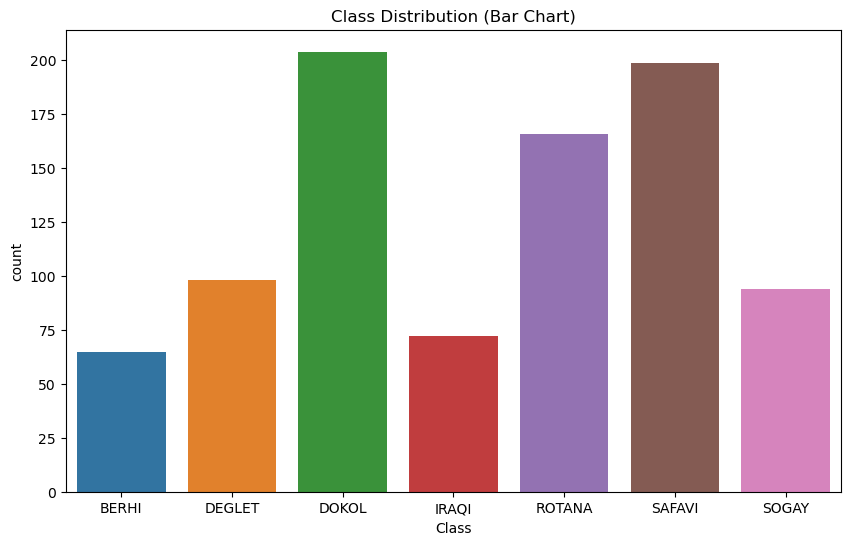

In [49]:
# visualisation of the target: Class
plt.figure(figsize=(10,6))
sns.countplot(x="Class",data=df)
plt.xlabel("Class")
plt.ylabel("count")
plt.title("Class Distribution (Bar Chart)")


## 

<Axes: >

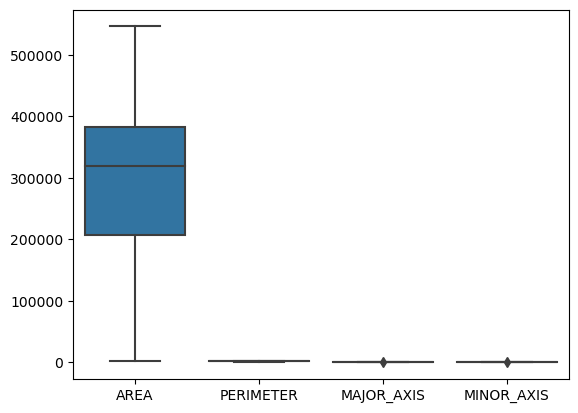

In [55]:
# Analyse descriptive des variables quantitatives
sns.boxplot(data=df[['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS']])

<Axes: >

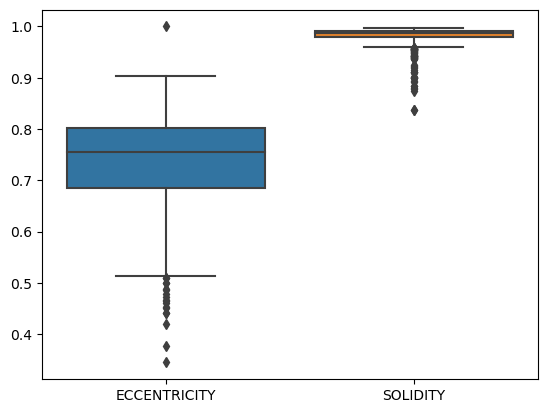

In [59]:
# Analyse descriptive des variables quantitatives
sns.boxplot(data=df[['ECCENTRICITY', 'SOLIDITY']])

### pour passer à ACP
- data doit etre quantitative or categorical ordinal(conditions)
- no missing values 
- no duplicated data
- normalization

## Normalisation

In [60]:
def dealingOutliers(data,columns):
    for item in columns:
        Q1=data[item].quantile(0.25) 
        Q3=data[item].quantile(0.75)
        IQR =Q3-Q1 
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        data[item]=data[item].apply(lambda x: lower_bound if x<lower_bound else ( upper_bound if x> upper_bound else x))
        
dealingOutliers(df,columns_to_visualize)

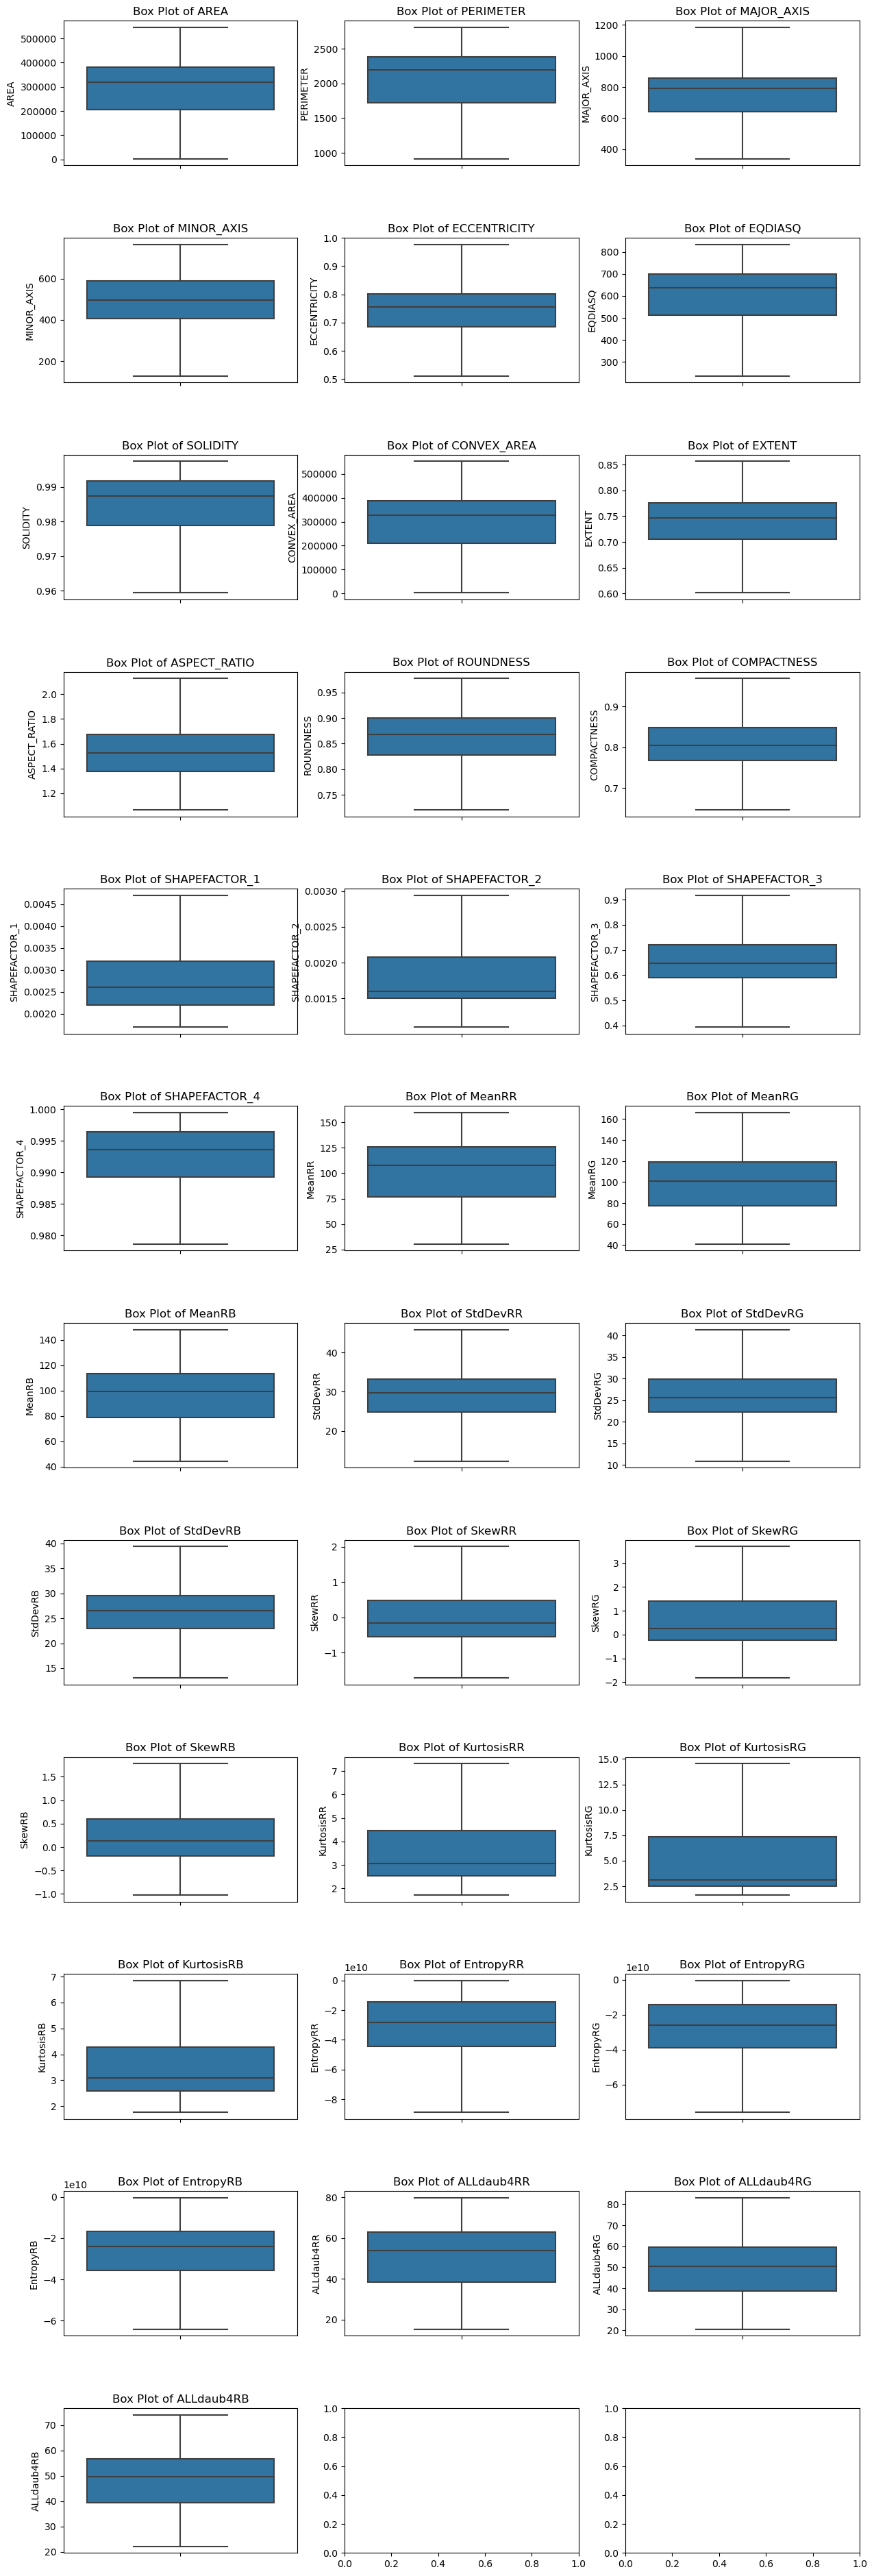

In [61]:
boxplots(df,columns_to_visualize)

No outeliers Now

In [62]:
# loi normale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

def scale(df,cols):
    df[cols] = scaler.fit_transform(df[cols])

scale(df, columns_to_visualize)


In [63]:
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,1.155640,0.783942,0.605355,1.316524,-1.184796,1.081230,1.036891,1.108752,0.885052,-1.111726,...,-0.324990,-0.588735,0.450477,-1.362536,-1.294207,-0.867331,0.538340,0.435593,-0.023908,BERHI
1,0.371700,0.067067,-0.187353,0.872611,-1.984617,0.432608,1.296149,0.323373,0.816408,-1.492029,...,-0.673013,-0.679144,-0.316472,-0.122270,-0.507102,-0.276284,-0.003550,0.284113,-0.024694,BERHI
2,2.132265,1.439131,1.320627,1.929625,-1.043100,1.804485,1.180923,2.069149,0.553271,-1.030533,...,-0.033403,-0.335316,0.805943,-2.835340,-2.721160,-2.294372,0.958897,0.742335,0.355243,BERHI
3,1.098729,0.716350,0.536755,1.313265,-1.310098,1.036453,1.046493,1.051992,0.747763,-1.179388,...,0.696697,0.997398,2.344263,-0.014994,-0.186259,-0.143106,-0.416894,-0.331475,-0.639369,BERHI
4,0.459641,0.250603,0.091888,0.763780,-1.077061,0.509110,0.662407,0.431717,0.385473,-1.050131,...,-0.628363,-0.583491,0.585199,-0.407905,-0.419043,0.135580,0.167646,0.148910,-0.502579,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,-0.400168,-0.322843,-0.409635,-0.165677,-0.168333,-0.290854,-0.518658,-0.393707,-0.186563,-0.401051,...,-0.888615,-0.753344,-0.642732,0.321825,0.579489,0.633910,-0.062039,-0.408235,-0.525831,SOGAY
894,0.630951,1.481663,0.727811,0.488512,0.303597,0.655213,-2.356269,0.760612,-1.281059,0.070711,...,-0.226454,-0.414003,0.278216,0.008317,0.414574,0.577602,-0.203952,-0.687141,-1.068502,SOGAY
895,-0.410179,-0.319497,-0.022772,-0.531259,0.868039,-0.300954,0.825643,-0.437594,-0.241860,0.840181,...,-0.869577,-0.714477,-0.660922,0.473572,0.554184,0.695590,-0.370644,-0.567152,-0.658919,SOGAY
896,-0.553622,-0.369446,-0.237207,-0.476649,0.571765,-0.448089,-2.256647,-0.506189,-0.787201,0.402017,...,-0.642359,-0.664450,-0.585553,0.284447,0.452918,0.540361,0.071247,-0.218832,-0.228759,SOGAY


In [65]:
from sklearn.decomposition import PCA

In [83]:
# Séparation des données en variables explicatives (X) et variable qualitative (Y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [84]:
# Réduction de dimension
pca = PCA()
X_pca=pca.fit_transform(X)

In [85]:
import numpy as np 
# Analyse des valeurs propres
comp = pd.DataFrame(
    {
        "Dimension" : [x for x in columns_to_visualize], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
comp


,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,AREA,1.468876e+01,43.0,43.0
1,PERIMETER,9.057965e+00,27.0,70.0
2,MAJOR_AXIS,4.180561e+00,12.0,82.0
3,MINOR_AXIS,1.552104e+00,5.0,87.0
4,ECCENTRICITY,1.281897e+00,4.0,90.0
5,EQDIASQ,7.957079e-01,2.0,93.0
6,SOLIDITY,6.115729e-01,2.0,95.0
7,CONVEX_AREA,4.664637e-01,1.0,96.0
8,EXTENT,2.632123e-01,1.0,97.0
9,ASPECT_RATIO,2.325990e-01,1.0,97.0


Text(3.25, 26, '25%')

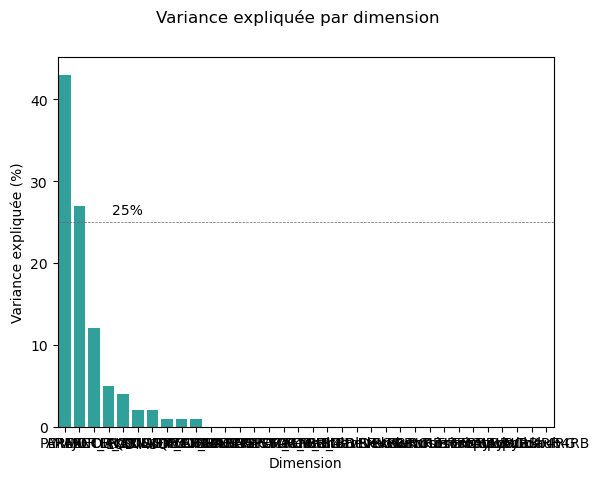

In [86]:
# Scree plot pour choisir le nombre de composantes principales
g_comp = sns.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["lightseagreen"],
                data = comp)
g_comp.set(ylabel = "Variance expliquée (%)")
g_comp.figure.suptitle("Variance expliquée par dimension")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
plt.text(3.25, 26, "25%")



In [87]:


# Calcul du cosinus carré des variables
cos_squared = np.square(pca.components_)

# Création d'un dataframe pandas avec le cosinus carré des variables
df_cos_squared = pd.DataFrame(cos_squared, columns=['PC{}'.format(i+1) for i in range(X.shape[1])])
df_cos_squared.index = df.columns[:-1]

print(df_cos_squared)



                        PC1           PC2           PC3           PC4  \
AREA           1.755119e-02  2.589535e-02  3.277236e-02  7.656059e-03   
PERIMETER      7.735059e-02  5.523193e-02  3.254502e-02  9.704282e-02   
MAJOR_AXIS     4.144621e-03  2.388497e-02  3.938463e-02  2.874917e-05   
MINOR_AXIS     4.752580e-04  3.523354e-04  3.040902e-03  4.395273e-04   
ECCENTRICITY   8.391722e-03  4.505616e-03  2.748888e-02  6.544199e-05   
EQDIASQ        2.402237e-04  3.566857e-04  1.177137e-03  2.688259e-03   
SOLIDITY       9.111937e-04  5.977090e-04  8.826796e-04  1.568857e-04   
CONVEX_AREA    8.737837e-05  9.265181e-04  1.727001e-03  4.226080e-05   
EXTENT         1.664510e-03  7.212071e-04  7.923219e-04  6.612526e-05   
ASPECT_RATIO   1.992608e-03  1.432449e-02  4.659455e-05  1.522243e-04   
ROUNDNESS      3.685683e-03  2.685369e-04  2.818466e-04  4.259986e-03   
COMPACTNESS    2.547866e-03  6.429438e-03  1.970254e-02  3.398319e-04   
SHAPEFACTOR_1  5.396246e-05  1.194301e-02  5.337322

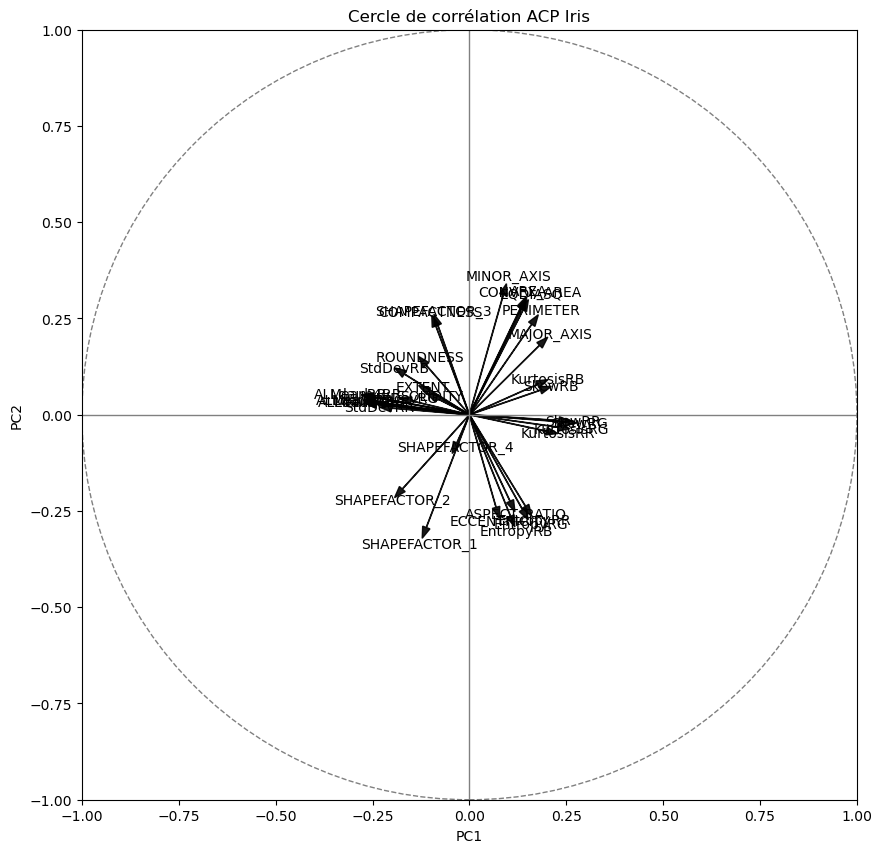

In [88]:

feature_names=['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB']

# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]

xs = np.array([1, 0])
ys = np.array([0, 1])

# Créer la figure
plt.figure(figsize=(10, 10))

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, feature_names[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP Iris')

# Afficher la figure
plt.show()

IndexError: list index out of range

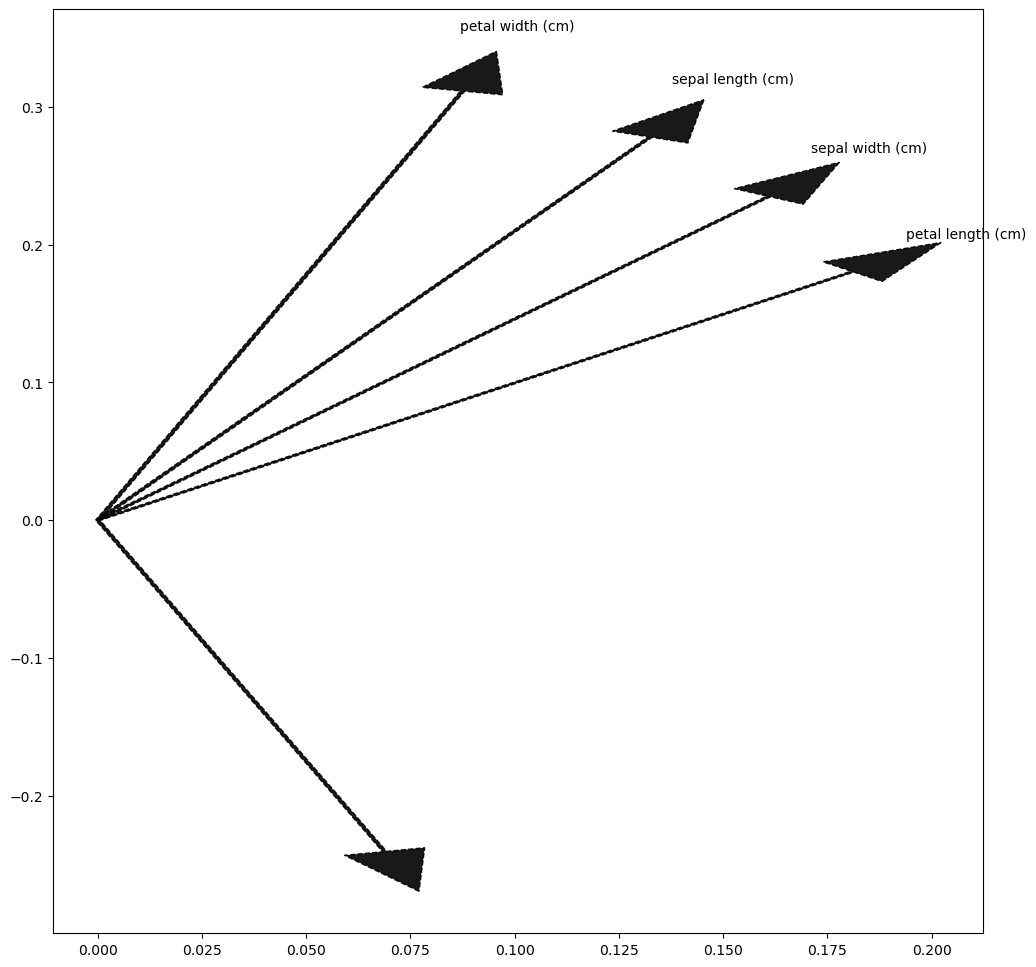

In [89]:






# Créer la figure
fig, ax = plt.subplots(figsize=(12, 12))

# Visualiser les catégories d'espèces avec les couleurs
colors = ['r', 'g', 'b']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02, linestyle='--')
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, iris.feature_names[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('ACP Iris avec cercle de corrélation et nuage des individus par catégorie')

# Afficher la légende
plt.legend(loc='best', shadow=False, scatterpoints=1)

# Afficher la figure
plt.show()

